<a href="https://colab.research.google.com/github/cheikh19/DaxStudio/blob/master/statInterferentielle_en_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LES TESTS STATISTQUES **

In [1]:
# Importer les packqges
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importer les tests à parir de library scipy
from scipy.stats import ttest_1samp  # test pour une variable quantitative
from scipy.stats import f_oneway # tester la corrélation entre variable quantita & varable qualit
from scipy.stats import chi2_contingency # On veut etudier deux variables qualitatives
from scipy.stats import chi2 # tester la corrélation entre 2 variable qualitatives
from scipy.stats import pearsonr # tester la corrélation entre 2 variable quantita





In [3]:
# Importer la base de donnée
df=pd.read_csv("/content/weight-height-bmi.csv")

In [4]:
# Lire labe de donnée
df.head(20)

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight
5,Male,1.708227,69.042216,Normal
6,Male,1.747141,83.428219,Overweight
7,Male,1.736052,76.190352,Overweight
8,Male,1.702281,79.800187,Overweight
9,Male,1.611795,70.941642,Overweight


In [5]:
# les caractériques des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
 3   BMI     10000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [6]:
df.nunique()

Gender        2
Height    10000
Weight    10000
BMI           4
dtype: int64

répartition égalitaire entre les hommes et les femmes,
Pas de valeurs manquantes

**TEST D'UNE VARIABLES QUANTITATIVE**

In [7]:
df['Height'].mean()

1.6857360177711003

On veut faire un test statistique pour vérifier si notre de taille de notre echantillon est correcte par rapport a la population.On suppose que la taille a une distribution normale   

                    H0: la moyenne est égale à 1.68
                    H1: la moyenne est différente de 1.68

In [8]:
tset, pval = ttest_1samp(df['Height'], 1.68)
print("p-values", pval)

if pval < 0.05 : # alpha value is 0.05 or 5 %
   print(" We are rejecting null hypothesis")
else:
   print(" We are accepting null hypothesis")

p-values 4.512370903373828e-09
 We are rejecting null hypothesis


le p-values est différente de 1.68 , H0 est rejetée

# **** CORRELATION ENTRE UNE VARIABLE QUANTITATIVE ET UNE VARIABLE QUALITATIVE : test ANOVA

On peut voir s'il y'a une correlation entre l'indice BMI et le poids

      H0 : pas de correlation entre BMI et le poids
      H1 : il y'a une correlation entre le poids et l'indice BMI

In [9]:
# test ANOVA (F-TEST)
df_anova = pd.read_csv('weight-height-bmi.csv')
df_anova = df_anova[['Weight', 'BMI']]
grps = pd.unique(df_anova.BMI.values)
print(grps)
d_data = {grp:df_anova['Weight'][df_anova.BMI == grp] for grp in grps}
print(d_data)

['Obesity' 'Normal' 'Overweight' 'Underweight']
{'Obesity': 0       109.720985
3        99.809504
33       93.069649
59       95.039544
78       89.108085
           ...    
4846     87.489569
4861    102.504845
4869    102.229925
4968     85.892814
4997     90.353440
Name: Weight, Length: 255, dtype: float64, 'Normal': 1       73.622732
5       69.042216
22      67.663936
24      73.484921
29      70.008586
          ...    
9994    50.135381
9995    62.041159
9997    58.275377
9998    74.322166
9999    51.550324
Name: Weight, Length: 4114, dtype: float64, 'Overweight': 2       96.497550
4       93.598619
6       83.428219
7       76.190352
8       79.800187
          ...    
9981    61.488655
9982    80.735777
9985    77.343883
9992    62.909437
9996    77.504315
Name: Weight, Length: 5589, dtype: float64, 'Underweight': 5009    47.242314
5191    41.153749
5214    38.098588
5360    31.289924
5394    42.743031
5605    41.747675
5655    41.174682
5740    36.528335
5883    39.412932
626

In [10]:
F, p = f_oneway(d_data['Normal'], d_data['Obesity'], d_data['Overweight'], d_data['Underweight'])
print("p-value for significance is: ", p)
if p<0.05:
    print("rejet null hypothesis")
else:
  print("accept null hypothesis")

p-value for significance is:  0.0
rejet null hypothesis


l'hypothese nulle est rejetée par consequent il y' a une correlation entre l'indice BMI et le poids

# CORRELATION ENTRE DEUX VARIABLES QUALITATIVES

On souhaite étudier la correlation entre le sexe et l'indice BMI

In [11]:
# Tracer un  tableau de contingence
contingency_table = pd.crosstab(df['Gender'],df['BMI'])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 BMI     Normal  Obesity  Overweight  Underweight
Gender                                          
Female    3887        0        1071           42
Male       227      255        4518            0


    H0: pas de relation entre BMI et Gender
    H1:il y'a une relation entre BMI et Gender

Text(50.72222222222221, 0.5, 'BMI')

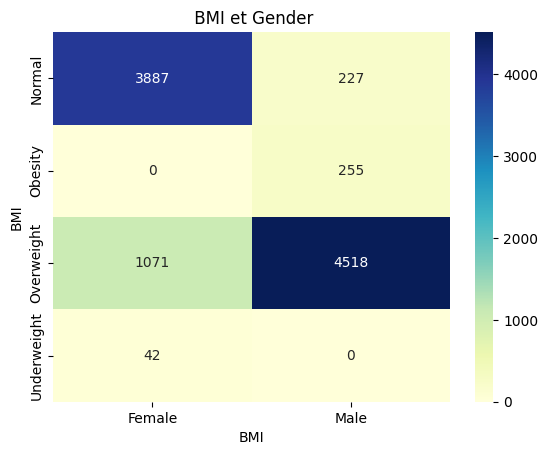

In [12]:
# Graphe de contingence
contingency_table = pd.crosstab(df['BMI'], df['Gender'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="YlGnBu")

# Ajouter des titres et des étiquettes
plt.title(' BMI et Gender')
plt.xlabel('BMI')
plt.ylabel('BMI')




In [13]:
from scipy.stats.contingency import expected_freq
# chi-square test of independance
c,p, dof,expected = chi2_contingency(contingency_table)
# Afficher le p-value
print(p)

0.0


chi2 = 0, l'hypothése H0 est rejetée par conséquent il y'a une relation entre BMI et Gender

In [14]:
# Observed values
Observed_Values = contingency_table.values
print("Observed Values :-\n", Observed_Values)

Observed Values :-
 [[3887  227]
 [   0  255]
 [1071 4518]
 [  42    0]]


In [15]:
b = chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n", Expected_Values)

Expected Values :-
 [[2057.  2057. ]
 [ 127.5  127.5]
 [2794.5 2794.5]
 [  21.    21. ]]


In [16]:
no_of_rows = len(contingency_table.iloc[:,0])
no_of_columns = len(contingency_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedoom:",ddof)


Degree of Freedoom: 3


In [17]:
alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip (Observed_Values, Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi_square statistic :-", chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha, df=ddof)
print('critical_value', critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic, df=ddof)
print('p-value', p_value)
print('Significance level :', alpha)
print('Degree of Freedom :', ddof)
print('chi-square statistic :',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value :',p_value)
if chi_square_statistic >=critical_value:
    print("Reject H0, il y'a une relation" )
else:
    print("Retain H0, pas de relation")
if p_value <= alpha:
    print("Reject H0, il y'a une relation" )
else:
    print("Retain H0, pas de relation")


chi_square statistic :- 5679.028654365087
critical_value 7.814727903251179
p-value 0.0
Significance level : 0.05
Degree of Freedom : 3
chi-square statistic : 5679.028654365087
critical_value: 7.814727903251179
p-value : 0.0
Reject H0, il y'a une relation
Reject H0, il y'a une relation


**chi square( deux variables catégoriques ) pour une autre base de données**

**Deux variables numériques**

On veut la relation entre le poids et la taille

In [18]:
df= pd.read_csv("/content/weight-height-bmi.csv")

In [19]:
df.head(20)

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight
5,Male,1.708227,69.042216,Normal
6,Male,1.747141,83.428219,Overweight
7,Male,1.736052,76.190352,Overweight
8,Male,1.702281,79.800187,Overweight
9,Male,1.611795,70.941642,Overweight


Text(0.5, 1.0, 'Height Weight')

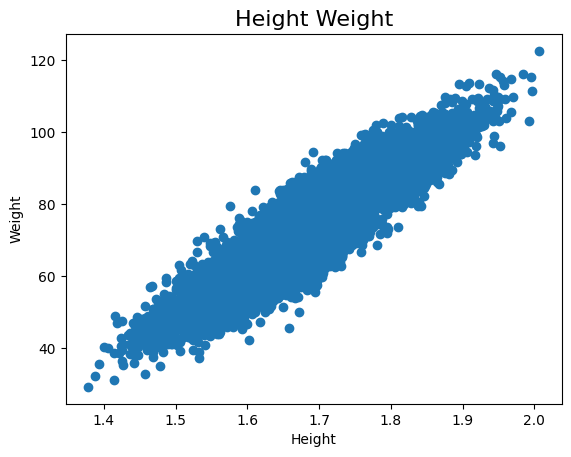

In [20]:
# Représentation graphique
fig= plt.figure()
ax=plt.axes()
x=df['Height']
y=df['Weight']
plt.scatter(x,y)
ax=ax.set(xlabel='Height', ylabel='Weight')
plt.title('Height Weight', fontsize=16)

In [21]:
df_male=df[df['Gender']=='Male']
df_male

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight
...,...,...,...,...
4995,Male,1.749046,80.345228,Overweight
4996,Male,1.751925,72.250505,Normal
4997,Male,1.702150,90.353440,Obesity
4998,Male,1.817566,84.325433,Overweight


Text(0.5, 1.0, "Frequence de l'age")

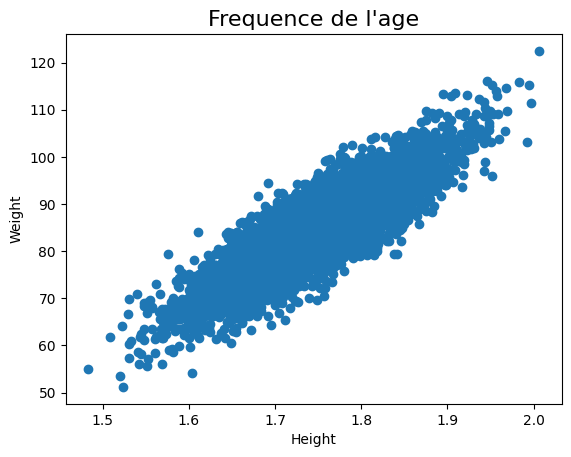

In [22]:
fig= plt.figure()
ax=plt.axes()
x=df_male['Height']
y=df_male['Weight']
plt.scatter(x,y)
ax=ax.set(xlabel='Height', ylabel='Weight')
plt.title("Frequence de l'age", fontsize=16)

In [23]:
r, p= pearsonr(df['Height'], df['Weight'])
print(p)

0.0


H0 est rejetée , il y'a une relation entre la taille(Weight) et le poids (Height)

In [24]:
my_rho = np.corrcoef(df_male['Height'],df_male['Weight'])
print(my_rho)

[[1.         0.86297885]
 [0.86297885 1.        ]]


0.8629 est positive et proche de 1 donc la corrélation est forte